# **Prediksi Risiko Diabetes Tahap Awal**

# **Pendahuluan**

Diabetes mellitus merupakan salah satu penyakit kronis yang menjadi tantangan kesehatan global karena prevalensinya yang terus meningkat setiap tahun. Berdasarkan laporan Organisasi Kesehatan Dunia (WHO), jumlah penderita diabetes di seluruh dunia telah mencapai ratusan juta jiwa dan diperkirakan akan terus bertambah jika tidak dilakukan pencegahan secara dini. Diabetes, khususnya tipe 2, berkembang secara perlahan dan sering kali tidak menunjukkan gejala pada tahap awal, sehingga banyak penderita tidak menyadari keberadaannya hingga terjadi komplikasi serius.

Oleh karena itu, prediksi dini terhadap risiko diabetes sangat penting dalam upaya pencegahan dan pengendalian penyakit ini. Dengan melakukan deteksi risiko sejak awal, tindakan preventif seperti perubahan gaya hidup, diet sehat, dan pengawasan medis dapat dilakukan sebelum penyakit berkembang lebih lanjut. Salah satu pendekatan yang dapat dimanfaatkan untuk memprediksi risiko diabetes tahap awal adalah melalui analisis data dan pemodelan prediktif berbasis machine learning.

Pendekatan ini memungkinkan identifikasi individu yang berisiko tinggi berdasarkan berbagai parameter kesehatan seperti usia, indeks massa tubuh (BMI), tekanan darah, kadar glukosa, dan faktor keturunan. Dengan demikian, teknologi prediktif tidak hanya meningkatkan efisiensi diagnosis, tetapi juga membantu sistem layanan kesehatan dalam menyusun strategi pencegahan yang lebih tepat sasaran.

# **Data Set**

Link Dataset: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

520 Data & 16 Fitur

Untuk memproses dan menganalisis data ini, langkah awal yang perlu dilakukan adalah mengunduh dan mengimpor dataset ke dalam lingkungan pemrograman seperti Python. Dataset ini dapat diakses secara langsung melalui UCI Machine Learning Repository.

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\raiha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)

KeyboardInterrupt: 

# **Tujuan**

Tujuan dari studi ini adalah untuk membangun model prediksi yang dapat mengidentifikasi risiko diabetes pada tahap awal dengan menganalisis data kesehatan individu, seperti usia, indeks massa tubuh (BMI), kadar glukosa, tekanan darah, dan riwayat keluarga. Dengan pendekatan ini, diharapkan deteksi dini terhadap potensi diabetes dapat dilakukan secara lebih efektif sehingga memungkinkan tindakan pencegahan yang tepat waktu, serta membantu meningkatkan kesadaran masyarakat terhadap pentingnya pemeriksaan kesehatan secara berkala.

# **Data Understanding**

**a. Penjelasan Fitur**

Age = Usia responden dalam rentang 1.20–65 tahun.

Sex = Jenis kelamin responden (1 = Male, 2 = Female).

Polyuria = Sering buang air kecil (1 = Yes, 2 = No).

Polydipsia = Rasa haus berlebihan (1 = Yes, 2 = No).

Sudden weight loss = Penurunan berat badan secara tiba-tiba (1 = Yes, 2 = No).

Weakness = Merasa lemah atau mudah lelah (1 = Yes, 2 = No).

Polyphagia = Nafsu makan meningkat secara tidak normal (1 = Yes, 2 = No).

Genital thrush = Infeksi jamur pada area genital (1 = Yes, 2 = No).

Visual blurring = Penglihatan kabur (1 = Yes, 2 = No).

Itching = Gatal-gatal pada kulit (1 = Yes, 2 = No).

Irritability = Mudah marah atau perubahan suasana hati (1 = Yes, 2 = No).

Delayed healing = Luka sulit sembuh (1 = Yes, 2 = No).

Partial paresis = Kelemahan sebagian otot (1 = Yes, 2 = No).

Muscle stiffness = Kekakuan otot (1 = Yes, 2 = No).

Alopecia = Kerontokan rambut (1 = Yes, 2 = No).

Obesity = Kegemukan atau kelebihan berat badan (1 = Yes, 2 = No).

Class = Hasil klasifikasi (1 = Positive, mengindikasikan diabetes; 2 = Negative, tidak mengindikasikan diabetes).

**b. Eksplorasi Data**

In [ ]:
import pandas as pd

# Ubah ke DataFrame untuk memudahkan eksplorasi
df = pd.DataFrame(data=X, columns=early_stage_diabetes_risk_prediction.feature_names)
df['class'] = y  # Tambahkan target ke DataFrame

# Info data untuk melihat jumlah data dan tipe fitur
print(df.info())

# Tampilkan beberapa baris pertama data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

**Kesimpulan Dataset:**
- Dataset terdiri dari 520 data pasien dengan 17 kolom fitur, termasuk fitur target (class).

- Hanya fitur age yang bertipe numerik (int64), sedangkan 16 fitur lainnya bertipe kategorikal (object).

- Fitur target (class) memiliki dua nilai:

Positive → indikasi penderita diabetes

Negative → tidak menderita diabetes

- Seluruh data tidak memiliki nilai yang hilang (null), sehingga siap untuk diproses lebih lanjut.

- Fitur-fitur seperti polyuria, polydipsia, sudden_weight_loss, obesity, dan lainnya merupakan gejala umum diabetes dan penting untuk analisis klasifikasi.

- Gender pasien dicatat sebagai Male dan Female, serta gejala ditulis dengan label Yes atau No.

- Data ini cocok digunakan untuk klasifikasi biner (diabetes vs. non-diabetes) menggunakan algoritma seperti Logistic Regression, Decision Tree, Naive Bayes, atau Random Forest.

**c. Visualisasi Data**

In [ ]:
import pandas as pd

# Ubah array X menjadi DataFrame dengan nama kolom
df = pd.DataFrame(data=X, columns=early_stage_diabetes_risk_prediction.feature_names)

# Tambahkan kolom target
df['class'] = y

# Atur agar semua kolom tampil secara horizontal
pd.set_option('display.max_columns', None)         # Tampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Jangan potong ke bawah

# Tampilkan seluruh isi DataFrame
print(df)

# Simpan ke file CSV
df.to_csv('early_stage_diabetes_data.csv', index=False)

     age  gender polyuria polydipsia sudden_weight_loss weakness polyphagia genital_thrush visual_blurring itching irritability delayed_healing partial_paresis muscle_stiffness alopecia obesity     class
0     40    Male       No        Yes                 No      Yes         No             No              No     Yes           No             Yes              No              Yes      Yes     Yes  Positive
1     58    Male       No         No                 No      Yes         No             No             Yes      No           No              No             Yes               No      Yes      No  Positive
2     41    Male      Yes         No                 No      Yes        Yes             No              No     Yes           No             Yes              No              Yes      Yes      No  Positive
3     45    Male       No         No                Yes      Yes        Yes            Yes              No     Yes           No             Yes              No               No       N

# **Preprocessing Data**

In [ ]:
import pandas as pd

# Load data dari file CSV
df = pd.read_csv('early_stage_diabetes_data.csv')

# Cek dan Tangani Missing Value
# Deteksi nilai '?' yang mungkin dianggap sebagai missing
print(df.isin(['?']).sum())

# Ganti '?' dengan NaN agar bisa diproses sebagai missing value
df.replace('?', pd.NA, inplace=True)

# Cek jumlah missing value setelah penggantian
print(df.isna().sum())

# Imputasi: Ganti NaN dengan nilai modus (paling sering muncul) untuk semua kolom bertipe kategorikal
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


In [ ]:
# Label Encoding (Ubah Kategori Jadi Angka)
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dictionary untuk menyimpan encoder setiap kolom
label_encoders = {}

# Lakukan encoding untuk semua kolom (fitur + target)
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Pastikan semua dalam bentuk string
    label_encoders[col] = le  # Simpan encoder untuk decoding di kemudian hari

In [ ]:
# Pisahkan Fitur dan Target (Splitting Data)
X = df.drop(columns='class')
y = df['class']

In [ ]:
# Simpan Hasil

# Simpan ke file CSV setelah preprocessing dan label encoding
df.to_csv('early_stage_diabetes_preprocessed.csv', index=False)

In [ ]:
# Cek Hasil Preprocessing
import pandas as pd

# Baca file hasil preprocessing
df = pd.read_csv('early_stage_diabetes_preprocessed.csv')

# Atur agar semua kolom dan baris bisa tampil
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

# Tampilkan seluruh isi DataFrame
print(df)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  genital_thrush  visual_blurring  itching  irritability  delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  class
0     16       1         0           1                   0         1           0               0                0        1             0                1                0                 1         1        1      1
1     34       1         0           0                   0         1           0               0                1        0             0                0                1                 0         1        0      1
2     17       1         1           0                   0         1           1               0                0        1             0                1                0                 1         1        0      1
3     21       1         0           0                   1         1           1               1                0        1             0    

# **Modeling Klasifikasi**

## **Modelling Klasifikasi dataset diabetes menggunakan Decission Tree**

Pemodelan ini bertujuan untuk mengklasifikasikan status risiko diabetes pada pasien berdasarkan sejumlah fitur gejala klinis, seperti polyuria (sering buang air kecil), polydipsia (haus berlebihan), penurunan berat badan mendadak, kelelahan, dan faktor lainnya yang umum ditemui pada tahap awal diabetes. Target klasifikasi terdiri dari dua kelas, yaitu: Positive (indikasi diabetes) dan Negative (tidak ada indikasi diabetes).

Model klasifikasi yang digunakan adalah Decision Tree Classifier, salah satu metode supervised learning berbasis aturan dan struktur pohon bercabang. Setiap percabangan dalam pohon mewakili keputusan berdasarkan nilai suatu fitur, dan setiap daun pohon menunjukkan hasil akhir klasifikasi.


### **1. Pembagian Dataset: Data Latih dan Data Uji**
Langkah awal dalam pemodelan adalah membagi data menjadi dua bagian:

- Data Latih (Training Set): digunakan untuk melatih model agar dapat mempelajari pola dari gejala yang ada.

- Data Uji (Testing Set): digunakan untuk mengukur performa model terhadap data yang belum pernah dilihat sebelumnya.

Dalam eksperimen ini digunakan rasio umum 80% data latih dan 20% data uji, agar model memiliki cukup data untuk belajar namun tetap dapat diuji pada data baru.


### **2. Pra-Pemrosesan Data**
Sebelum digunakan dalam model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan:

- Label Kategori: Nilai target class awalnya berupa string (Positive, Negative) dan diubah menjadi numerik:

  - 1 → Positive (indikasi diabetes)

  - 0 → Negative (tidak ada indikasi diabetes)

- Pemisahan Fitur dan Target: Kolom target (class) dipisahkan dari fitur gejala untuk keperluan pelatihan model.

- Diskritisasi Tidak Diperlukan: Karena Decision Tree mampu menangani fitur kategorikal maupun numerik secara langsung tanpa perlu normalisasi atau transformasi.


### **3. Pelatihan Model Decision Tree**
Model dilatih menggunakan algoritma Decision Tree, di mana:

- Setiap node pada pohon memisahkan data berdasarkan fitur yang paling informatif, diukur dengan Gini Index (atau bisa juga menggunakan Entropy).

- Proses pembentukan cabang pohon dilakukan secara rekursif hingga tercapai batas maksimum atau tidak ada pemisahan fitur yang signifikan lagi.

Dalam eksperimen ini digunakan konfigurasi:

- Kriteria: gini

- Kedalaman maksimum (max_depth): 5, untuk menghindari overfitting dan menjaga interpretabilitas.


### **4. Evaluasi Model**
Setelah pelatihan, model digunakan untuk memprediksi status risiko diabetes pada data uji (X_test). Evaluasi dilakukan menggunakan metrik berikut:

- Akurasi: Mengukur proporsi prediksi yang benar terhadap total data uji.

- Classification Report: Menyajikan metrik seperti precision, recall, dan F1-score untuk masing-masing kelas (Positive dan Negative).

- Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

Selain evaluasi numerik, model juga divisualisasikan dalam bentuk pohon keputusan, sehingga proses klasifikasi dapat dipahami secara intuitif. Setiap simpul menunjukkan fitur yang digunakan, nilai batas keputusan, dan distribusi kelas pada node tersebut.


### **5. Prediksi Risiko Diabetes**
Setelah model selesai dievaluasi, ia dapat digunakan untuk:

- Memprediksi risiko diabetes pada pasien baru berdasarkan input gejala seperti polyuria, polydipsia, dan kelelahan.

- Memberikan wawasan terhadap fitur yang paling berpengaruh, membantu tenaga medis dalam memahami pola awal risiko diabetes.


### **Kesimpulan**

Decision Tree merupakan metode klasifikasi yang efektif dan mudah dipahami, sangat cocok digunakan dalam klasifikasi gejala klinis untuk mendeteksi risiko diabetes tahap awal. Keunggulan utamanya meliputi:

- Dapat menangani data kategorikal dan numerik tanpa memerlukan proses normalisasi.

- Strukturnya mudah divisualisasikan dan diinterpretasikan, sehingga memudahkan tenaga medis memahami alur pengambilan keputusan.

- Proses pelatihan cepat dan fleksibel, cocok untuk dataset kecil hingga menengah seperti data klinis gejala diabetes.

Model ini sangat bermanfaat sebagai alat bantu diagnosis awal, membantu dokter atau sistem pendukung keputusan dalam memprediksi risiko diabetes secara cepat, bahkan sebelum dilakukan pemeriksaan lanjutan yang lebih kompleks.




=== Decision Tree ===
Akurasi: 0.9519230769230769

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Confusion Matrix:


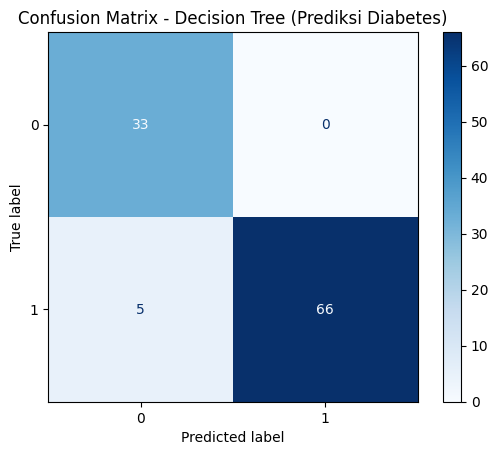

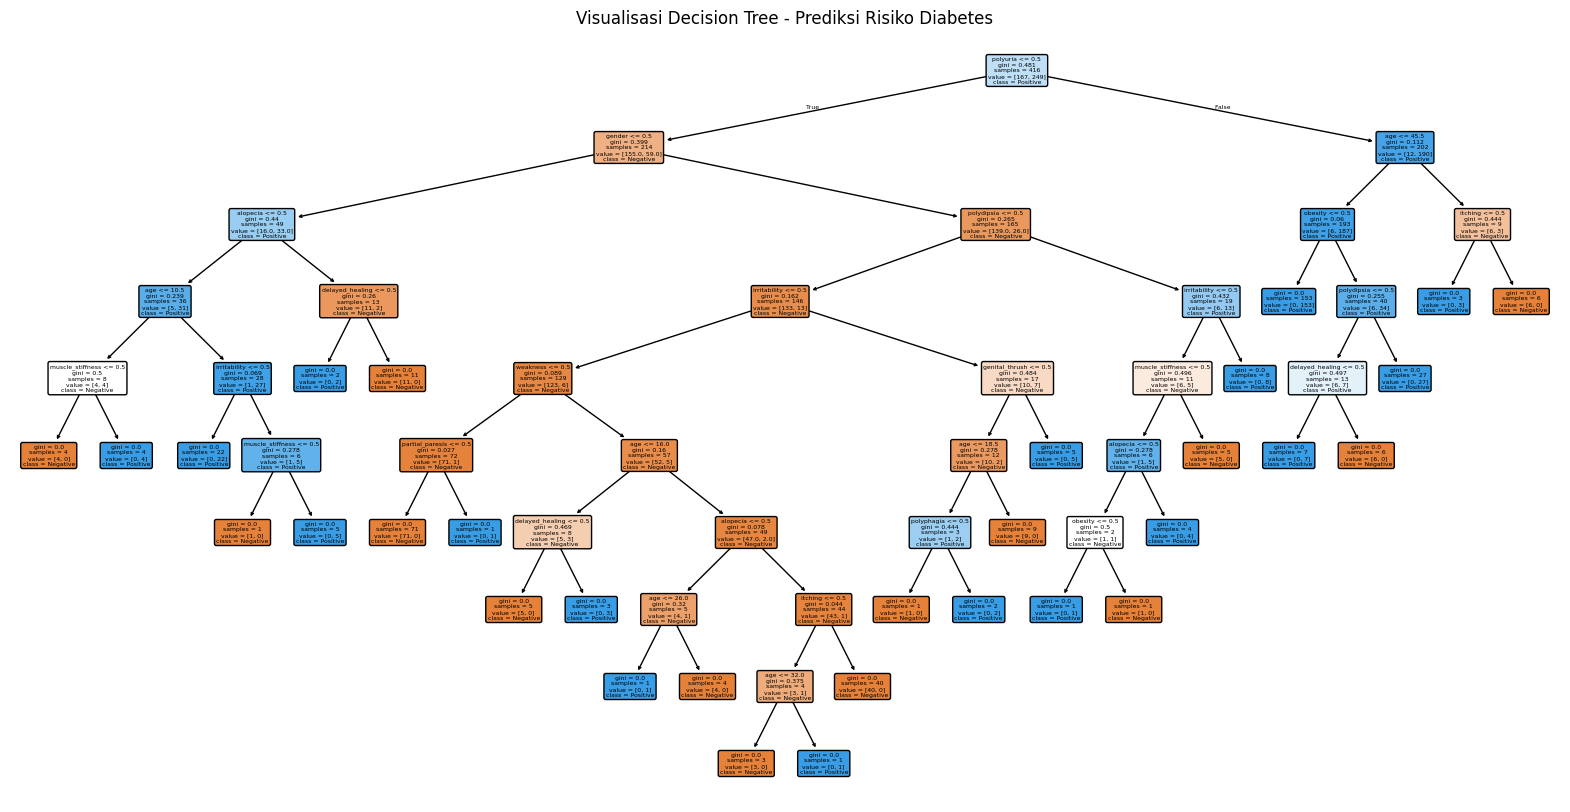

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = df.drop(columns='class')
y = df['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Evaluasi
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree (Prediksi Diabetes)")
plt.show()

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=['Negative', 'Positive'],
    rounded=True
)
plt.title("Visualisasi Decision Tree - Prediksi Risiko Diabetes")
plt.show()


## **Modelling Klasifikasi dataset diabetes menggunakan KNN**

Model K-Nearest Neighbors (KNN) digunakan dalam pemodelan ini untuk memprediksi apakah seorang pasien tergolong dalam kategori Positive (berisiko diabetes) atau Negative (tidak berisiko diabetes), berdasarkan fitur-fitur gejala klinis seperti polyuria, polydipsia, kelelahan, penurunan berat badan mendadak, serta faktor lainnya.

KNN merupakan metode instance-based learning, di mana prediksi terhadap data baru dilakukan dengan membandingkan jaraknya terhadap data latih, kemudian menentukan kelas berdasarkan mayoritas tetangga terdekat (nearest neighbors).

### **1. Pembagian Dataset: Data Latih dan Data Uji**
Sama seperti metode supervised learning lainnya, dataset dibagi menjadi dua bagian utama:

- Data Latih (Training Set): Digunakan sebagai referensi dalam pencarian tetangga terdekat.

- Data Uji (Testing Set): Digunakan untuk mengevaluasi kemampuan model mengenali pola baru yang belum pernah dilihat.

Pada pemodelan ini digunakan rasio umum 80% data latih dan 20% data uji, untuk menjaga keseimbangan antara pembelajaran dan pengujian.

### **2. Pra-Pemrosesan Data**
Agar algoritma KNN bekerja dengan optimal, dilakukan beberapa langkah preprocessing berikut:

- Encoding Label Target: Kolom class (dengan nilai awal Positive dan Negative) telah diubah menjadi bentuk numerik:

   - 1 → Positive (berisiko diabetes)

   - 0 → Negative (tidak berisiko)

- Encoding Fitur Kategorikal: Semua fitur gejala yang semula berbentuk Yes/No atau string lain telah diubah menjadi bentuk numerik menggunakan Label Encoding.

- Normalisasi (Scaling): Karena KNN sangat sensitif terhadap skala data, semua fitur numerik dilakukan normalisasi (misalnya dengan StandardScaler) agar setiap fitur memiliki kontribusi yang setara dalam perhitungan jarak. Tanpa proses ini, fitur dengan nilai lebih besar dapat mendominasi jarak Euclidean.

### **3. Konsep Kerja KNN**
Berbeda dengan model seperti Decision Tree yang membentuk aturan eksplisit, KNN bekerja berdasarkan kemiripan antar titik data. Proses klasifikasinya adalah:

- Hitung jarak (misalnya Euclidean distance) antara data uji dan semua data latih.

- Pilih k tetangga terdekat (dalam eksperimen ini digunakan k=5).

- Lakukan voting mayoritas terhadap kelas dari tetangga-tetangga tersebut.

- Kelas yang paling banyak muncul menjadi hasil prediksi akhir.

Contoh: jika dari 5 tetangga terdekat, 3 di antaranya tergolong Positive dan 2 Negative, maka data baru akan diprediksi sebagai Positive.

### **4. Evaluasi Model**
Setelah dilakukan pelatihan dan prediksi, performa model dievaluasi dengan beberapa metrik:

- Akurasi: Proporsi prediksi yang benar terhadap total data uji.

- Classification Report: Menyajikan precision, recall, dan F1-score untuk masing-masing kelas (Positive dan Negative).

- Confusion Matrix: Menunjukkan distribusi prediksi benar dan salah untuk kedua kelas, berguna untuk menganalisis jenis kesalahan klasifikasi.

Selain itu, eksperimen terhadap nilai k (misalnya k=3, k=7, dll.) juga dapat dilakukan untuk mencari kombinasi terbaik yang menghasilkan akurasi maksimal.

### **Kesimpulan**

Model K-Nearest Neighbors (KNN) memberikan hasil yang baik dalam mengklasifikasikan risiko diabetes berdasarkan gejala klinis pasien. Dengan pra-pemrosesan yang tepat seperti encoding dan normalisasi, KNN mampu bekerja secara efektif meskipun dengan pendekatan yang sederhana.

Metode ini cocok digunakan dalam sistem pendukung keputusan medis, karena dapat memberikan prediksi cepat berdasarkan kemiripan gejala antar pasien, bahkan sebelum pemeriksaan lanjutan dilakukan.


=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.8942307692307693

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104

Confusion Matrix:


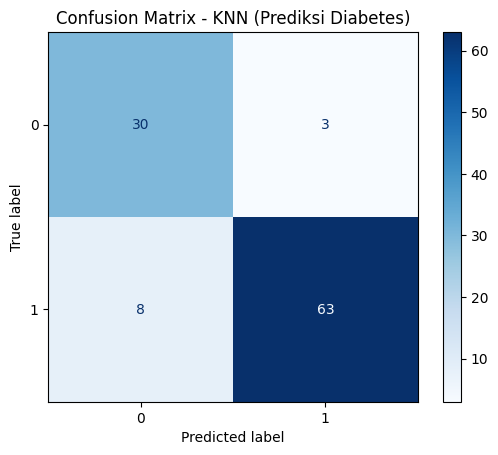

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Normalisasi Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi seluruh fitur

# Split data (jika belum)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Pelatihan dan Evaluasi KNN ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
print("=== K-Nearest Neighbors (KNN) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - KNN (Prediksi Diabetes)")
plt.show()

## **Modelling Klasifikasi dataset diabetes menggunakan Naive Baiyes**

Modelling ini bertujuan untuk memprediksi apakah seorang pasien berisiko mengalami diabetes (Positive) atau tidak (Negative) berdasarkan fitur-fitur klinis seperti polyuria, polydipsia, kelemahan, penurunan berat badan mendadak, dan gejala lainnya yang umum terjadi pada tahap awal diabetes.

Naive Bayes adalah algoritma klasifikasi berbasis probabilistik yang bekerja dengan menghitung peluang suatu data termasuk ke dalam kelas tertentu, dengan asumsi bahwa semua fitur bersifat independen satu sama lain. Metode ini cepat, sederhana, dan efektif, menjadikannya sangat cocok untuk deteksi dini penyakit seperti diabetes.

### **1. Pembagian Dataset menjadi Data Latih dan Data Uji**
Langkah pertama dalam proses pemodelan adalah membagi dataset menjadi dua bagian:

- Data Latih (Train Set): Digunakan untuk melatih model, menghitung statistik yang dibutuhkan.

- Data Uji (Test Set): Digunakan untuk menguji kinerja model pada data yang belum pernah dilihat.

Dalam eksperimen ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan pembagian umum dalam machine learning. Rasio ini bisa disesuaikan tergantung kebutuhan dan ukuran data.

### **2. Menghitung Probabilitas Awal (Prior Probability)**
Setelah data dibagi, langkah selanjutnya adalah menghitung probabilitas awal (prior) untuk masing-masing kelas target, yaitu:

- Positive (berisiko diabetes)

- Negative (tidak berisiko diabetes)

- Probabilitas prior ini dihitung dengan:

- Menghitung jumlah data latih untuk masing-masing kelas.

- Membagi jumlah tersebut dengan total keseluruhan data latih.

Nilai prior ini menunjukkan kemungkinan awal seorang pasien termasuk ke dalam kelas tertentu, sebelum mempertimbangkan gejala yang dialaminya.

### **3. Menghitung Rata-rata dan Standar Deviasi Setiap Fitur**
Untuk model Gaussian Naive Bayes, rata-rata (mean) dan standar deviasi (standard deviation) setiap fitur akan dihitung untuk setiap kelas. Ini penting karena Gaussian Naive Bayes mengasumsikan bahwa nilai-nilai fitur numerik mengikuti distribusi normal.

Jika semua fitur dalam dataset sudah dalam bentuk numerik (setelah encoding), maka proses ini berlaku untuk semua kolom.

### **4. Menghitung Distribusi Gaussian**
Untuk menghitung probabilitas kemunculan nilai fitur tertentu dalam suatu kelas, digunakan rumus distribusi Gaussian berikut:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Keterangan:

- $x$: nilai fitur input
- $\mu$: rata-rata fitur pada kelas tertentu
- $\sigma$: standar deviasi fitur pada kelas tertentu

Setiap nilai fitur pasien dibandingkan dengan distribusi fitur pada kelas Positive dan Negative.

### **5. Menghitung Probabilitas Posterior**
Setelah menghitung probabilitas dari setiap fitur, semua dikalikan dengan prior untuk mendapatkan posterior probability:

$$
P(C_i|X) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Keterangan:

- $P(x_k|C_i)$: hasil dari fungsi Gaussian fitur ke-$k$ pada kelas $C_i$
- $P(C_i)$: prior probability dari kelas $C_i$


Model akan menghitung probabilitas ini untuk masing-masing kelas (Positive, Negative).

### **6. Menentukan Prediksi Kelas**
Setelah menghitung nilai posterior untuk setiap kelas, model akan memilih kelas dengan nilai probabilitas tertinggi sebagai hasil prediksi. Artinya, model akan memutuskan apakah pasien termasuk kategori Positive atau Negative berdasarkan fitur gejala yang diberikan.


### **Kesimpulan**
Model Gaussian Naive Bayes sangat cocok digunakan dalam deteksi dini diabetes, karena:

- Cepat dan efisien — cocok untuk implementasi sistem real-time atau di perangkat terbatas.

- Tidak memerlukan normalisasi fitur atau transformasi rumit.

- Sangat efektif untuk data biner dan gejala-gejala klinis yang terpisah.

Model ini dapat diintegrasikan dengan sistem pendukung keputusan (Decision Support System) untuk membantu dokter atau tim medis dalam melakukan diagnosis awal dengan cepat, sebelum melakukan pemeriksaan laboratorium lebih lanjut.

=== Naive Bayes ===
Akurasi: 0.9134615384615384

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

Confusion Matrix:


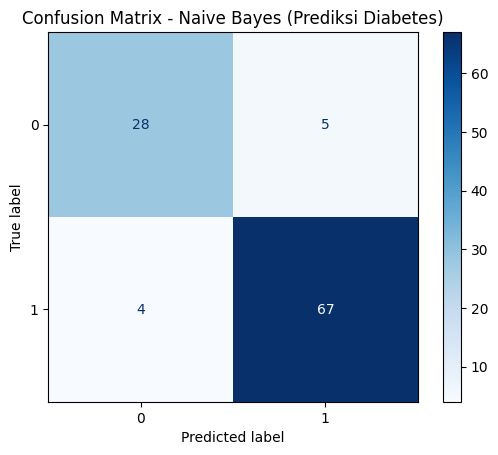

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi dan latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb_model.predict(X_test)

# Evaluasi
print("=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes (Prediksi Diabetes)")
plt.show()

# **Evaluasi**

**Kesimpulan dan Analisis**
Decision Tree:

- Akurasi tertinggi (95.19%).

- Sangat baik dalam mendeteksi kedua kelas, terutama recall untuk kelas 0 = 1.00 (tidak berisiko).

- Cocok digunakan untuk sistem klinis karena dapat divisualisasikan dan mudah dijelaskan ke pengguna awam (dokter/pasien).

Naive Bayes:

- Performa cukup tinggi (91.35%) dengan precision dan recall yang imbang.

- Keunggulan: cepat, ringan, dan cocok untuk data bersifat kategorikal.

- Cocok untuk sistem diagnosis awal berbasis probabilistik.

K-Nearest Neighbors (KNN):

- Akurasi paling rendah (89.42%).

- Lebih sensitif terhadap skala data dan outlier, sehingga perlu normalisasi.

- Masih layak dipakai, tapi kalah dari dua metode lainnya dalam hal akurasi dan kestabilan prediksi.



Model Terbaik
Berdasarkan akurasi tertinggi, f1-score yang seimbang, serta kemampuan interpretasi model, Decision Tree adalah metode paling bagus untuk dataset prediksi risiko diabetes tahap awal ini.

Model ini tidak hanya akurat, tetapi juga mudah dijelaskan secara medis, yang penting dalam praktik dunia nyata untuk mendukung pengambilan keputusan oleh tenaga kesehatan.

## **Deployment**

Dari ketiga model, saya memilih model terbaik adalah DECISION TREE, yang memiiki akurasi tertinggi yaitu 95,19%

## **Hasil Web**

Link web: https://vaniaput.streamlit.app/

Berikut adalah hasil dari webnya. Terdapat form untuk memasukkan fitur-fitur yang nantinya akan diprediksi.

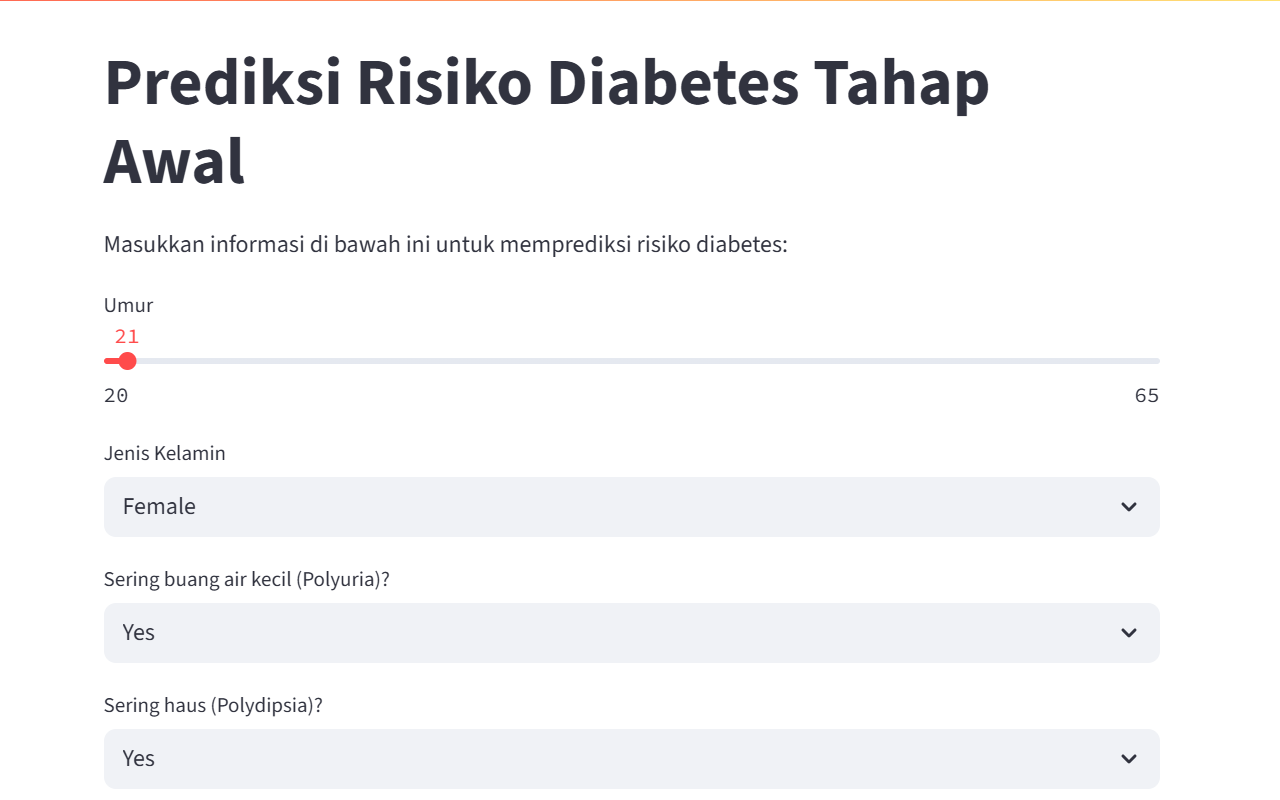


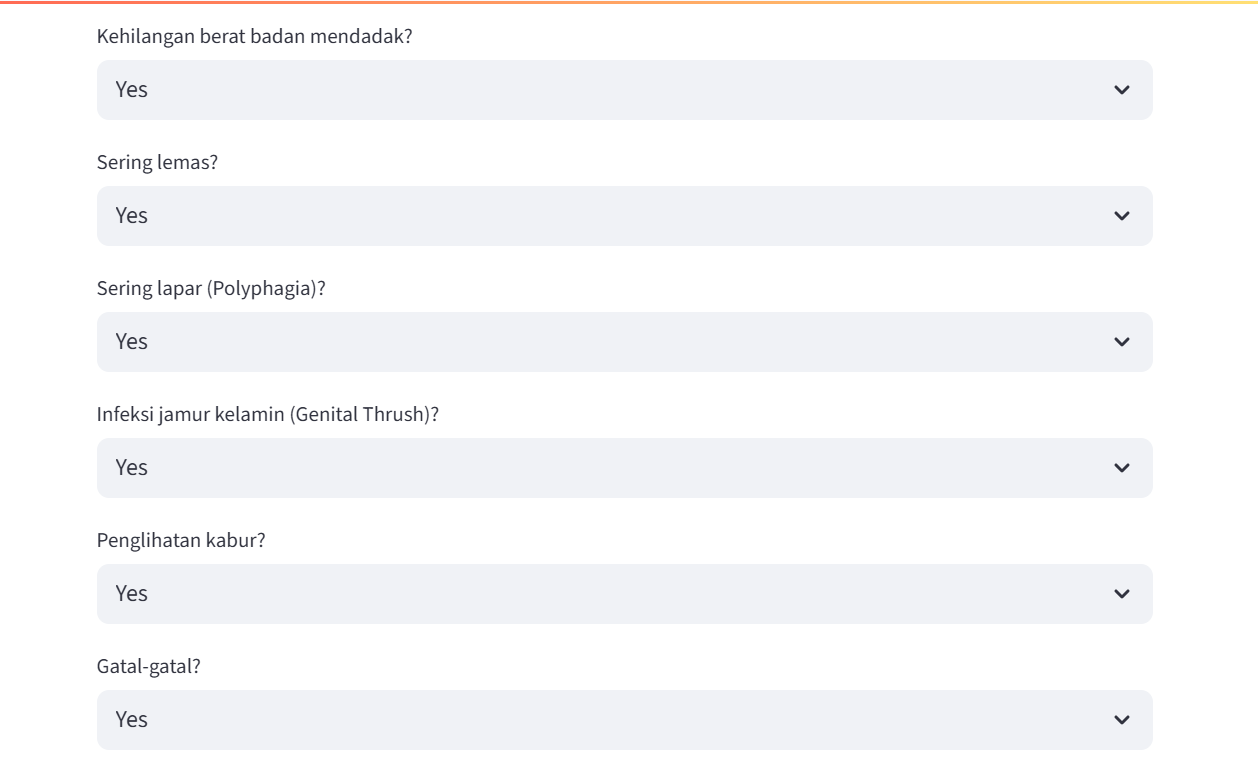


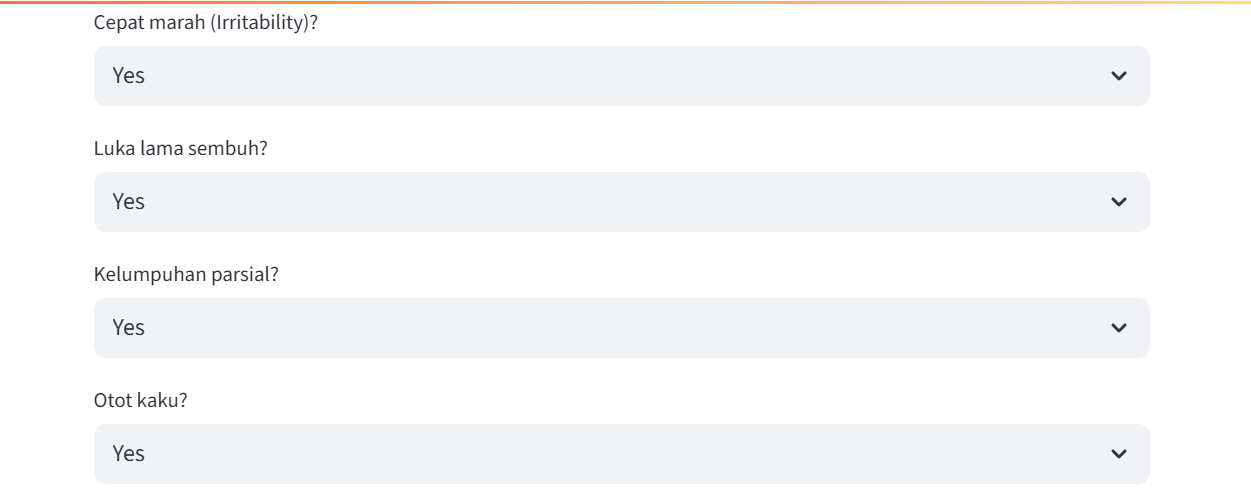

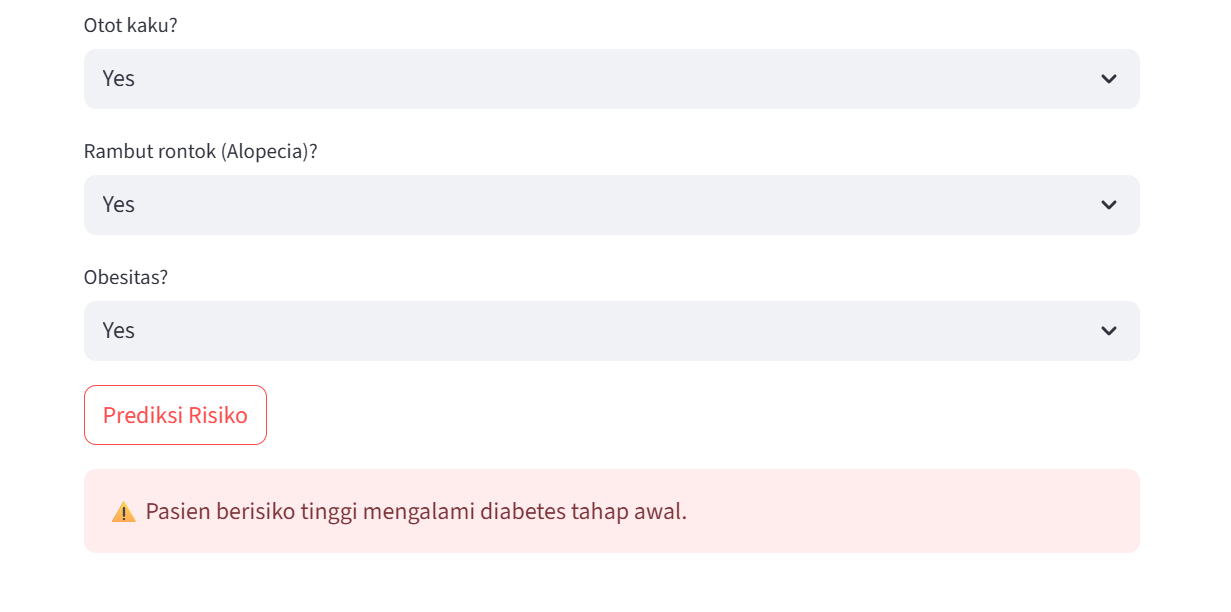